# **Project : Credit Card Fraud Detection**

##### **Project Type**    - Supervised Learning
##### **Contribution**    - Team
##### **Team Member 1 -Manasvi Save**
##### **Team Member 2 -Sameer Rudani**


# **Project Summary -**

Credit card fraud detection involves the use of various technologies and techniques to identify and prevent unauthorized or fraudulent transactions on credit cards.To examine transaction data and identify odd or suspicious activity, common techniques include machine learning algorithms, anomaly detection, and pattern recognition. To improve credit card transaction security and shield cardholders and financial institutions from fraudulent activity, real-time monitoring, behavioural analysis, and authentication methods are also used. To guarantee a smooth and safe payment experience for authorised users, the objective is to promptly detect and halt fraudulent transactions while reducing false positives.

# **GitHub Link -**

https://github.com/msave121/Credit-Card-Fraud-Detection

# **Problem Statement**


The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

Dataset:
The dataset includes instances of both authentic and fraudulent credit card transactions from the past. Numerous characteristics, including the transaction amount, timestamp, location, and other pertinent data, define each transaction. To differentiate between authentic and fraudulent transactions, the dataset is labelled.

Challenges:

Class Imbalance:
When fraudulent transactions are more uncommon than legitimate ones, there is an imbalance in the classes. To make sure the model doesn't start to favour the majority class, it is imperative to address this imbalance.

Dynamic Nature of Fraud:
Fraud patterns evolve over time, requiring the model to adapt and learn new patterns continuously. The solution should be dynamic and capable of updating its knowledge to detect emerging fraud tactics.

Real-time Processing:
To quickly identify possible fraud and stop illegal transactions, the model must function in real-time or almost in real-time.

# ***Let's Begin !***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Null Values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### ***There are no null values in the dataset.***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Descriptive Statistics

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [ ]:
data.shape

(284807, 31)

#### ***There are 284807 rows and 31 columns.***

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Fraud cases and genuine cases

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [ ]:
non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [ ]:
fraud=data[data['Class']==1]

In [ ]:
genuine=data[data['Class']==0]

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Exploratory Data Analysis

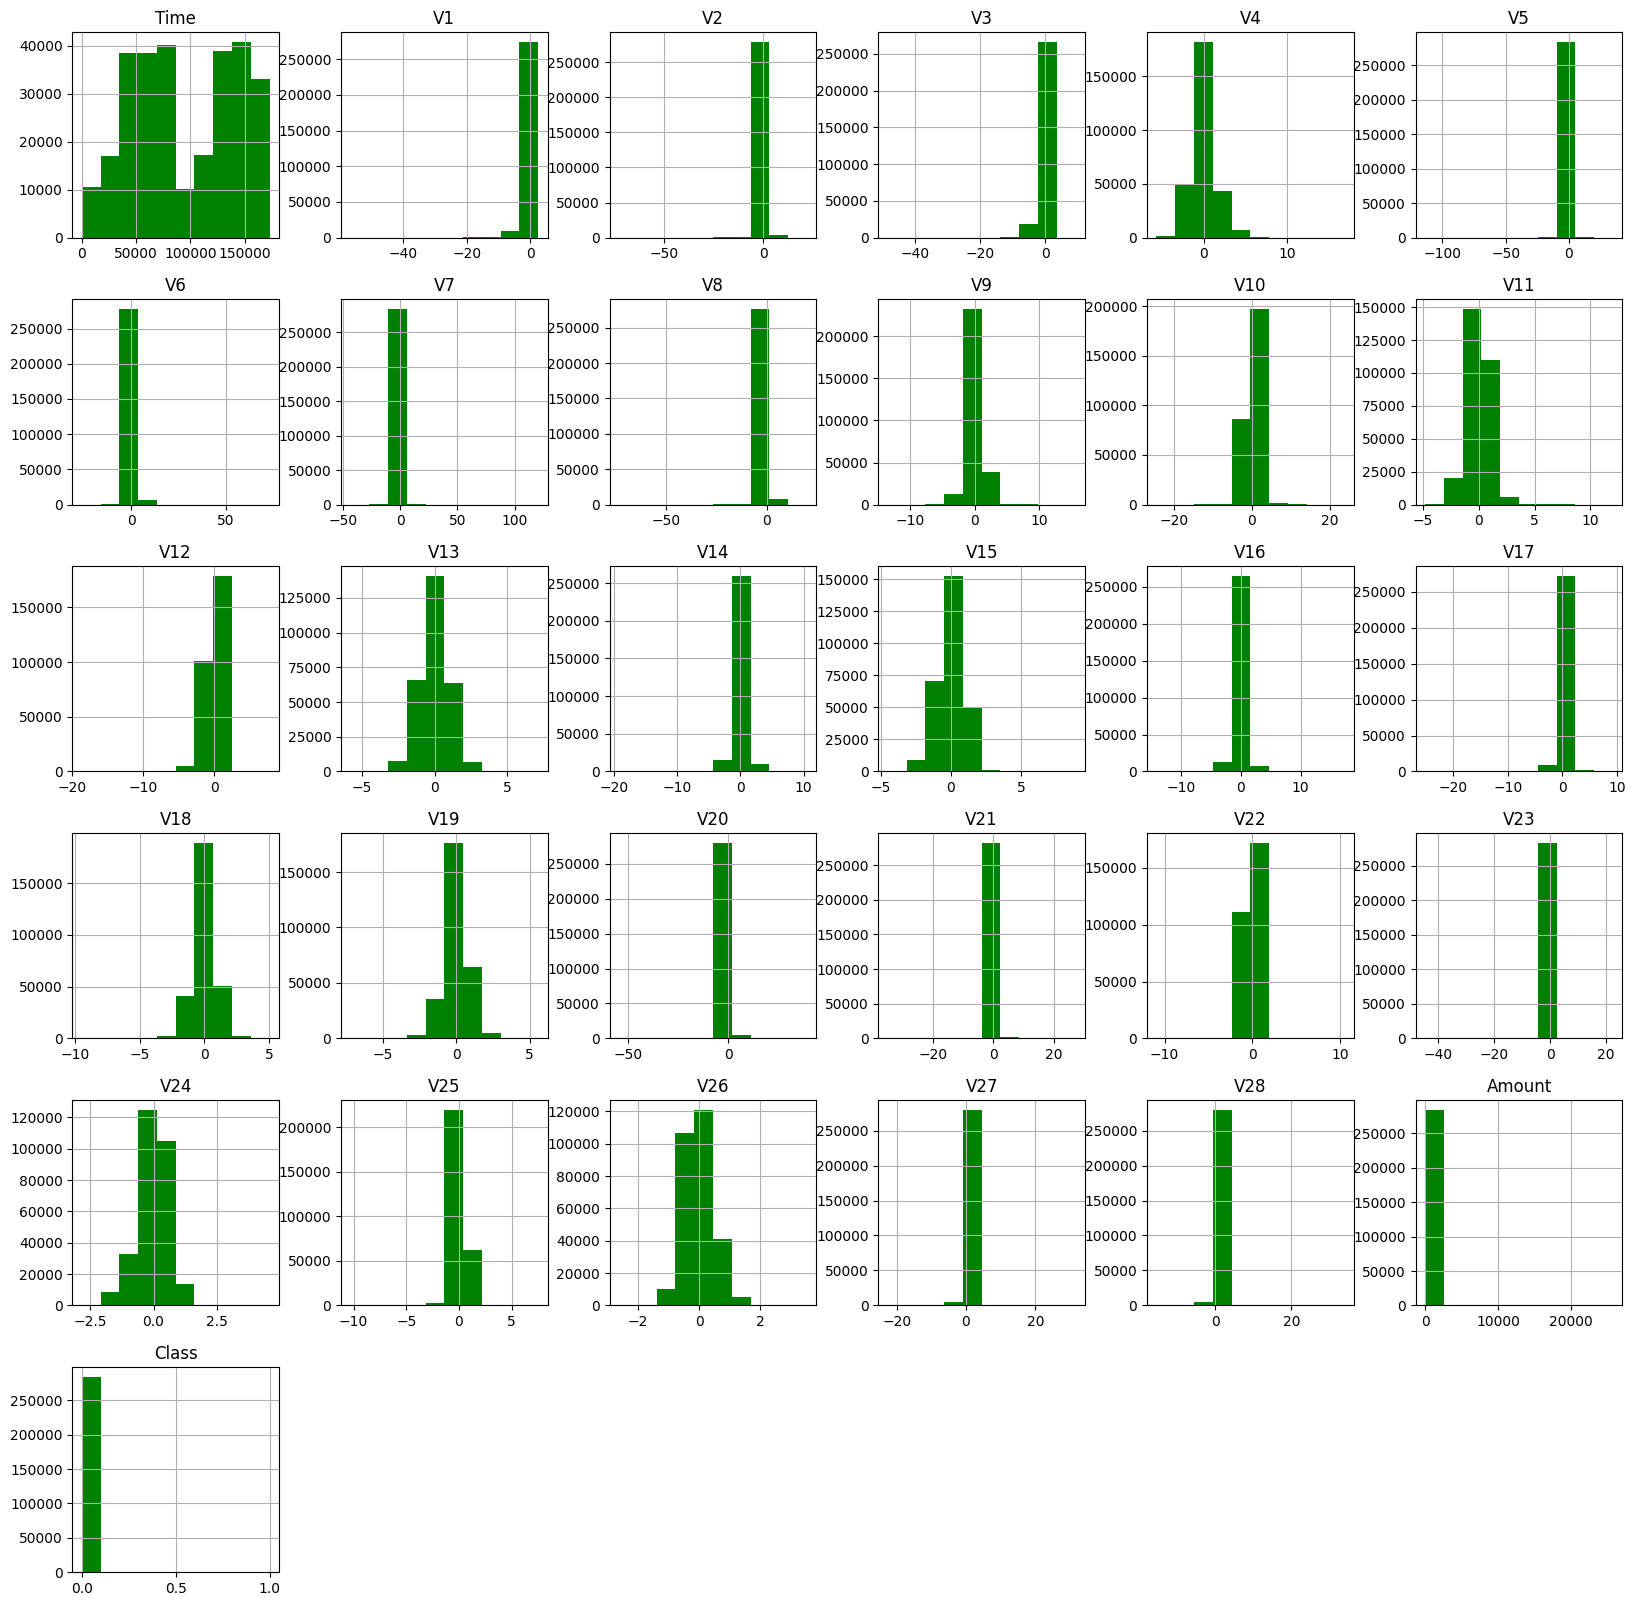

In [ ]:
data.hist(figsize=(20,20),color='green')
plt.show()

### Calculate Time of transaction vs Amount by class

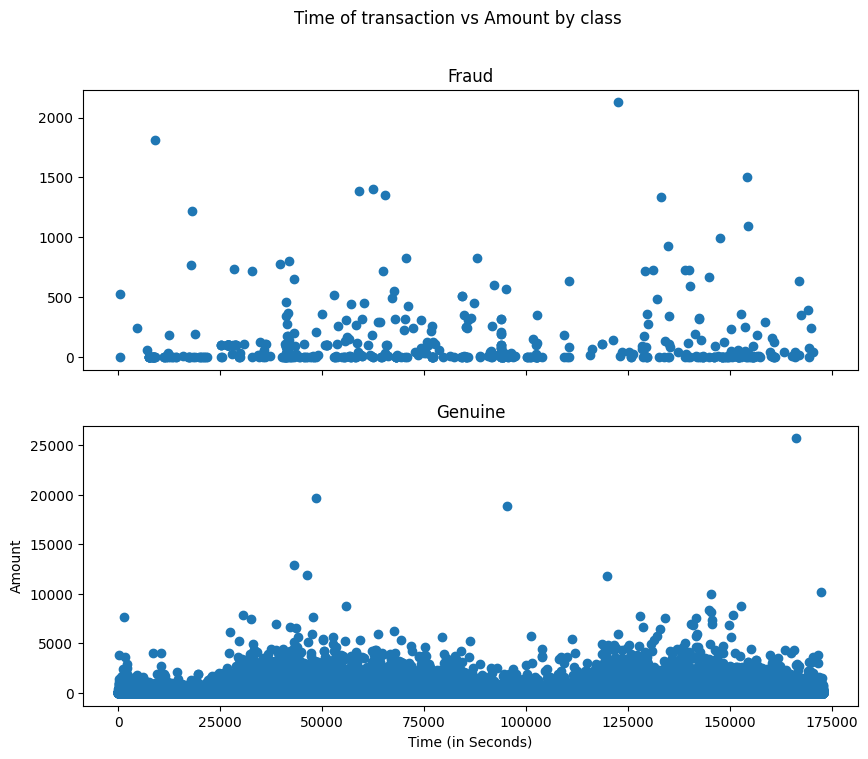

In [ ]:
rcParams['figure.figsize'] = 10, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Correlation

<Axes: >

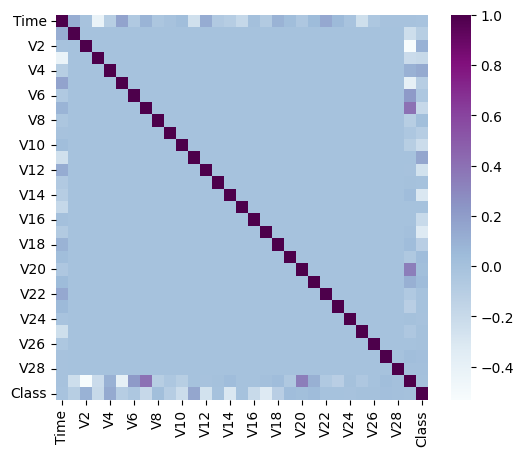

In [ ]:
plt.figure(figsize=(6,5))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

### **Under Sampling**
### Builed a sample dataset containing similar distribution of normal transaction and fraudlend transaction

Number of Fraudlent Transaction --> 492

In [ ]:
genuine_sample = genuine.sample(n = 492)

### **Concatinating two DataFrame**

In [ ]:
new_data = pd.concat([genuine_sample,fraud],axis=0)

In [ ]:
new_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143661,85519.0,1.199340,-0.101936,-0.562083,-0.385163,0.248146,-0.453464,0.395478,-0.185777,-0.306835,...,-0.350587,-1.232353,-0.064752,-0.671363,0.298893,0.774446,-0.127166,-0.007819,83.85,0
150368,93168.0,2.003626,0.006546,-2.936565,0.466058,3.000330,3.352173,-0.071199,0.589591,1.328676,...,-0.101028,0.032511,0.031534,0.646982,0.483193,-0.511706,-0.027595,-0.072298,20.89,0
213136,139125.0,-0.705032,0.446806,0.179748,-0.073739,0.886641,-1.252005,0.753311,-0.153933,0.240873,...,0.123524,0.413910,-0.205819,-0.023341,-0.201388,0.368286,-0.041311,0.278212,23.95,0
273791,165701.0,-1.376866,2.001544,-1.733068,-0.709897,0.112319,-0.344856,-0.162220,1.261294,-0.458577,...,0.459481,1.300083,0.001960,0.265227,-0.567207,-0.225373,0.355613,0.235050,8.49,0
209590,137631.0,-0.559908,0.272118,0.845864,-1.351001,0.038852,-0.089962,0.756160,-0.224736,-1.605715,...,-0.024506,-0.102653,-0.313953,0.639575,0.609127,-0.057938,-0.060433,0.036688,88.50,0


In [ ]:
new_data.shape

(984, 31)

In [ ]:
new_data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95555.481707,0.034989,-0.019120,0.018619,-0.017625,0.111039,-0.021926,0.019122,0.025330,0.002621,...,-0.009350,0.030038,0.023903,-0.006292,0.040106,0.058735,0.034734,-0.000873,-0.012568,72.890996
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Selecting the data into Feature and Target

In [ ]:
X = new_data.drop(columns="Class", axis=1)
y = new_data["Class"]

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143661,85519.0,1.199340,-0.101936,-0.562083,-0.385163,0.248146,-0.453464,0.395478,-0.185777,-0.306835,...,0.150254,-0.350587,-1.232353,-0.064752,-0.671363,0.298893,0.774446,-0.127166,-0.007819,83.85
150368,93168.0,2.003626,0.006546,-2.936565,0.466058,3.000330,3.352173,-0.071199,0.589591,1.328676,...,-0.234094,-0.101028,0.032511,0.031534,0.646982,0.483193,-0.511706,-0.027595,-0.072298,20.89
213136,139125.0,-0.705032,0.446806,0.179748,-0.073739,0.886641,-1.252005,0.753311,-0.153933,0.240873,...,-0.158294,0.123524,0.413910,-0.205819,-0.023341,-0.201388,0.368286,-0.041311,0.278212,23.95
273791,165701.0,-1.376866,2.001544,-1.733068,-0.709897,0.112319,-0.344856,-0.162220,1.261294,-0.458577,...,-0.024903,0.459481,1.300083,0.001960,0.265227,-0.567207,-0.225373,0.355613,0.235050,8.49
209590,137631.0,-0.559908,0.272118,0.845864,-1.351001,0.038852,-0.089962,0.756160,-0.224736,-1.605715,...,0.263751,-0.024506,-0.102653,-0.313953,0.639575,0.609127,-0.057938,-0.060433,0.036688,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
y

143661    0
150368    0
213136    0
273791    0
209590    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# Spliting the data in training data and test data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model training


In [ ]:
model = LogisticRegression()

In [ ]:
#Training the LogisticRegression model with training data
model.fit(X_train,y_train)

LogisticRegression()

#Model Evaluation
####Accuracy score

In [ ]:
#Accuracy score on training data
X_train_prediction = model.predict(X_train)
accuracy_score_on_training_data = accuracy_score(y_train,X_train_prediction)
print("Accuracy score on training data: ",accuracy_score_on_training_data)

Accuracy score on training data:  0.9440914866581956


In [ ]:
#Accuracy score on test data
X_test_prediction = model.predict(X_test)
accuracy_score_on_test_data = accuracy_score(y_test,X_test_prediction)
print("Accuracy score on test data: ",accuracy_score_on_test_data)

Accuracy score on test data:  0.9238578680203046


# Conclusion

In conclusion, the use of logistic regression in the identification of credit card fraud has shown to be successful and efficient. We can examine and model the likelihood of fraudulent transactions based on a variety of characteristics by utilising this statistical technique. The model exhibits its capability to differentiate between authentic and fraudulent activities, thereby furnishing financial institutions with an invaluable instrument to augment security protocols.

Logistic regression is a practical choice for fraud detection because of its interpretability and simplicity, which helps stakeholders understand and trust the decision-making process. It's important to recognise, though, that logistic regression may not be able to handle complex relationships or non-linear patterns found in the data.

In order to further enhance fraud detection systems, future studies could investigate the combination of feature engineering and more sophisticated machine learning techniques to capture subtle patterns and improve model performance. However, logistic regression is a fundamental method and a first step towards creating reliable and accurate credit card fraud detection systems.